In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import tqdm as tqdm

In [8]:
dir_path = '9517proj_sources/train'
test_path = '9517proj_sources/valid/valid'
file_list = os.listdir(dir_path)
test_list = os.listdir(test_path)
for i in range(len(file_list)):
    file_list[i] = os.path.join(dir_path, file_list[i])
file_list.sort()
for i in range(len(test_list)):
    test_list[i] = os.path.join(test_path, test_list[i])
test_list.sort()
print(file_list[0])
print(type(file_list[0]))
print(test_list[0])
print(type(test_list[0]))

9517proj_sources/train/image_id_000.jpg
<class 'str'>
9517proj_sources/valid/valid/image_id_000.jpg
<class 'str'>


In [19]:
img = cv2.imread('9517proj_sources/train/image_id_000.jpg', cv2.COLOR_BGR2RGB)
print(type(img))
print(img.shape)
print(img.dtype)
print(img[319,319])

<class 'numpy.ndarray'>
(640, 640, 3)
uint8
[143 149 156]


In [66]:
f_p = '9517proj_sources/train_annotations'
f_p_truth = '9517proj_sources/valid_annotations'
with open(f_p, 'r') as label_info:
    label_info = eval(label_info.read())
    # print(list(lable_info))
    # print(label_info)
    print(type(label_info))
    print(label_info[199])
with open(f_p_truth, 'r') as label_info_truth:
    label_info_truth = eval(label_info_truth.read())
    # print(list(lable_info))
    # print(label_info)
    print(type(label_info_truth))
    print(label_info_truth[65])

<class 'list'>
{'id': 199, 'image_id': 199, 'category_id': 2, 'bbox': [29, 155, 199, 125], 'area': 24875, 'segmentation': [], 'iscrowd': 0}
<class 'list'>
{'id': 65, 'image_id': 65, 'category_id': 2, 'bbox': [137, 93, 421, 185], 'area': 77885, 'segmentation': [], 'iscrowd': 0}


In [152]:
bboxes = []
valid_bboxes = []
for i in label_info:
    bboxes.append(i['bbox'])
for i in label_info_truth:
    valid_bboxes.append(i['bbox'])
print(bboxes[0])
print(len(bboxes))

[119, 25, 205, 606]
500


In [58]:
catelog = []
for i in label_info:
    catelog.append(i['category_id'])


In [64]:
def find_corner(x_min, y_min, width, height):
    x_max = x_min + width
    y_max = y_min + height
    return [x_min, y_min, x_max, y_max]

In [38]:
corners = []
for i in bboxes:
    corner = find_corner(i[0], i[1], i[2], i[3])
    corners.append(corner)
print(len(corners))

500


In [125]:
def draw_rectangle(img, corner):
    x_min, y_min, x_max, y_max = corner
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)
    return img

In [130]:
def draw_rectangle_off_background(img, corner):
    x_min, y_min, x_max, y_max = corner
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 0, 255, 255), 2)
    return img

In [63]:
for i in tqdm.tqdm(range(len(file_list))):
    text1 = "Penguin"
    text2 = "Turtle"
    img = cv2.imread(file_list[i], cv2.COLOR_BGR2RGB)
    img = draw_rectangle(img, corners[i])
    (text1_width, text1_height), _ = cv2.getTextSize(text1, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    (text2_width, text2_height), _ = cv2.getTextSize(text2, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    position1 = (corners[i][2] - text1_width - 10, corners[i][3] - text1_height - 10)
    position2 = (corners[i][2] - text2_width - 10, corners[i][3] - text2_height - 10)
    if catelog[i] == 1:
        cv2.putText(img, text1, position1, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    else:
        cv2.putText(img, text2, position2, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    cv2.imwrite('9517proj_sources/train_with_frame_and_label/image_id_{}.jpg'.format(i), img)

100%|██████████| 500/500 [00:01<00:00, 423.14it/s]


In [142]:
cooorners = []
def find_corners_off_background(img):
    het, wid, _ = img.shape
    # row_with_nonzero_alpha = -9999
    # col_with_nonzero_alpha = -9999
    rows = []
    cols = []
    for i in range(het):
        for j in range(wid):
            if img[i][j][3] != 0:
                # row_with_nonzero_alpha = i
                rows.append(i)
                break

    for k in range(wid):
        for l in range(het):
            if img[l][k][3] != 0:
                # col_with_nonzero_alpha = k
                cols.append(k)
                break


    # print(rows[0], rows[-1])
    # print()
    # print(cols[0], cols[-1])
    xmi = cols[0]
    xma = cols[-1]
    ymi = rows[0]

    yma = rows[-1]

    return [xmi, ymi, xma, yma]



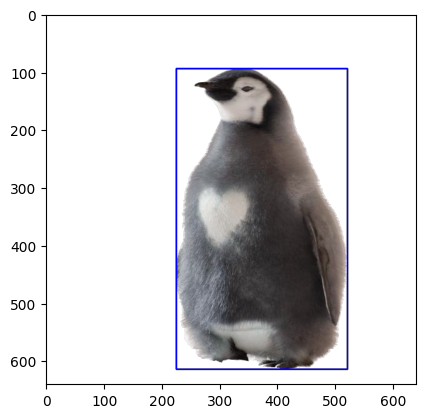

In [140]:
pic1 = cv2.imread("9517proj_sources/off test/image_id_000.png", cv2.IMREAD_UNCHANGED)
het, wid, _ = pic1.shape
# row_with_nonzero_alpha = -9999
# col_with_nonzero_alpha = -9999
rows = []
cols = []
for i in range(het):
    for j in range(wid):
        if pic1[i][j][3] != 0:
            # row_with_nonzero_alpha = i
            rows.append(i)
            break

for k in range(wid):
    for l in range(het):
        if pic1[l][k][3] != 0:
            # col_with_nonzero_alpha = k
            cols.append(k)
            break


# print(rows[0], rows[-1])
# print()
# print(cols[0], cols[-1])
xmi = cols[0]
xma = cols[-1]
ymi = rows[0]

yma = rows[-1]
coooners = [xmi, ymi, xma, yma]
# print(xmi, ymi, xma, yma)
pic_test = draw_rectangle_off_background(pic1, coooners)

plt.imshow(pic_test)
plt.show()

# if row_with_nonzero_alpha != -9999:
#     print("最上方的第一个非透明像素所在的行数：", row_with_nonzero_alpha)
# else:
#     print('no')
# if col_with_nonzero_alpha != -9999:
#     print('leftest', col_with_nonzero_alpha)
# else:
#     print('no')

In [138]:
off_bg_path = '9517proj_sources/off test'
off_bg_list = os.listdir(off_bg_path)
print(len(off_bg_list))
print(sorted(off_bg_list)[0])
#something was hidden in the folder need to delete from the list
for i in range(len(off_bg_list)):
    off_bg_list[i] = os.path.join(off_bg_path, off_bg_list[i])
off_bg_list.sort()
off_bg_list = off_bg_list[1:]
print(len(off_bg_list))
print(off_bg_list[0])

73
.DS_Store
72
9517proj_sources/off test/image_id_000.png


In [143]:
ans_corners = []
for i in tqdm.tqdm(range(len(off_bg_list))):
    img = cv2.imread(off_bg_list[i], cv2.IMREAD_UNCHANGED)
    corner = find_corners_off_background(img)
    ans_corners.append(corner)
    img = draw_rectangle_off_background(img, corner)
    cv2.imwrite("9517proj_sources/valid_off_background_with_frame/image_id_{}.png".format(i), img)

100%|██████████| 72/72 [00:31<00:00,  2.29it/s]


In [154]:
res_boxes = []
print(ans_corners[0])
for i in valid_bboxes:
    res_boxes.append(find_corner(i[0], i[1], i[2], i[3]))
print(res_boxes[0])

[225, 94, 521, 614]
[227, 93, 525, 618]


In [2]:
##Calculate cosine similarity
def cosine_similarity(vector_test,vector_pred):
    dot = 0
    norm_of_test = 0
    norm_of_pred = 0
    for i in range(len(vector_pred)):
        dot += vector_test[i]*vector_pred[i]
        norm_of_test += (vector_test[i]**2)
        norm_of_pred += (vector_pred[i]**2)
    norm_of_test = norm_of_test**0.5
    norm_of_pred = norm_of_pred**0.5
    if (norm_of_test==0 or norm_of_pred==0):
        return 1
    result = dot/(norm_of_test*norm_of_pred)
    return result

In [3]:
def all_one_D_train():
    result = []
    file_list = os.listdir("9517proj_sources/off")
    for i in range(len(file_list)):
        file_list[i] = os.path.join("9517proj_sources/off", file_list[i])
    for file in file_list:
        one_D_train_image_B = []
        one_D_train_image_G = []
        one_D_train_image_R = []
        one_D_train_image_T = []
        train_image_matrix = cv2.imread(file,cv2.IMREAD_UNCHANGED)
        train_image_matrix = cv2.resize(train_image_matrix,(64,64))
        for i in range(len(train_image_matrix)):
            for j in range(len(train_image_matrix[i])):
                one_D_train_image_B.append(train_image_matrix[i][j][0])
                one_D_train_image_G.append(train_image_matrix[i][j][1])
                one_D_train_image_R.append(train_image_matrix[i][j][2])
                one_D_train_image_T.append(train_image_matrix[i][j][3])
        result.append([one_D_train_image_B,one_D_train_image_G,one_D_train_image_R,one_D_train_image_T])
    return result

all_file_one_d_train_matrix = all_one_D_train()



In [36]:
def one_d_target(file):

    target_file_matrix = cv2.imread(file,cv2.IMREAD_UNCHANGED)
    target_file_matrix = cv2.resize(target_file_matrix,(64,64))
    one_D_target_image_B = []
    one_D_target_image_G = []
    one_D_target_image_R = []
    one_D_target_image_T = []
    for i in range(len(target_file_matrix)):
        for j in range(len(target_file_matrix[i])):
            one_D_target_image_B.append(target_file_matrix[i][j][0])
            one_D_target_image_G.append(target_file_matrix[i][j][1])
            one_D_target_image_R.append(target_file_matrix[i][j][2])
            one_D_target_image_T.append(target_file_matrix[i][j][3])
    return [one_D_target_image_B,one_D_target_image_G,one_D_target_image_R,one_D_target_image_T]

all_file_one_d_target_matrix = one_d_target("9517proj_sources/off test/image_id_034.png")

In [37]:
def calculate_image_cosine_similarity(all_matrix,target_matrix):
    result = []
    for single in all_matrix:
        temp_result = []
        temp_result.append(cosine_similarity(single[0],target_matrix[0]))
        temp_result.append(cosine_similarity(single[1],target_matrix[1]))
        temp_result.append(cosine_similarity(single[2],target_matrix[2]))
        temp_result.append(cosine_similarity(single[3],target_matrix[3]))
        result.append(temp_result)
    return result

k = 5
tuple_list = []
temp = calculate_image_cosine_similarity(all_file_one_d_train_matrix,all_file_one_d_target_matrix)
for i in range(len(temp)):
    tuple_list.append((i,sum(temp[i])))

result = sorted(tuple_list, key = lambda x:x[1],reverse = True)

vote = {'1':0,'2':0}


f_p = '9517proj_sources/train_annotations'
with open(f_p, 'r') as label_info:
    label_info = eval(label_info.read())





/var/folders/1n/pdk52r396lv_3lksmg91dk840000gn/T/ipykernel_66539/221479904.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  dot += vector_test[i]*vector_pred[i]


In [38]:
for i in range(len(result[:k])):
    if label_info[result[i][0]]['category_id'] == 1:
        vote['1'] += 1
    else:
        vote['2'] += 1

print(vote)
if vote['1']>= vote['2']:
    print(1,"penguin")
else:
    print(2,"turtle")




{'1': 3, '2': 2}
1 penguin


In [47]:
k= 3
file_list = os.listdir("9517proj_sources/off test")
for i in range(len(file_list)):
    file_list[i] = os.path.join("9517proj_sources/off test", file_list[i])
file_list.sort()
right = 0
times = 0
f_p = '9517proj_sources/train_annotations'
with open(f_p, 'r') as label_info:
    label_info = eval(label_info.read())
v_a = '9517proj_sources/valid_annotations'
with open(v_a, 'r') as pred_info:
    pred_info = eval(pred_info.read())
for file in file_list:
    print(file)
    all_file_one_d_target_matrix = one_d_target(file)
    temp = calculate_image_cosine_similarity(all_file_one_d_train_matrix,all_file_one_d_target_matrix)
    tuple_list = []
    for i in range(len(temp)):
        tuple_list.append((i,sum(temp[i])))
    result = sorted(tuple_list, key = lambda x:x[1],reverse = True)
    vote = {'1':0,'2':0}
    for i in range(len(result[:k])):
        if label_info[result[i][0]]['category_id'] == 1:
            vote['1'] += 1
        else:
            vote['2'] += 1

    print(vote)
    if vote['1']>= vote['2']:
        if pred_info[times]['category_id'] == 1:
            right += 1
            times += 1
        else:
            times += 1
        print(1,"penguin")
    else:
        if pred_info[times]['category_id'] == 2:
            right += 1
            times += 1
        else:
            times += 1
        print(2,"turtle")
print(right/times)

9517proj_sources/off test/image_id_000.png


/var/folders/1n/pdk52r396lv_3lksmg91dk840000gn/T/ipykernel_66539/221479904.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  dot += vector_test[i]*vector_pred[i]


{'1': 2, '2': 1}
1 penguin
9517proj_sources/off test/image_id_001.png
{'1': 2, '2': 1}
1 penguin
9517proj_sources/off test/image_id_002.png
{'1': 2, '2': 1}
1 penguin
9517proj_sources/off test/image_id_003.png
{'1': 1, '2': 2}
2 turtle
9517proj_sources/off test/image_id_004.png
{'1': 2, '2': 1}
1 penguin
9517proj_sources/off test/image_id_005.png
{'1': 1, '2': 2}
2 turtle
9517proj_sources/off test/image_id_006.png
{'1': 2, '2': 1}
1 penguin
9517proj_sources/off test/image_id_007.png
{'1': 1, '2': 2}
2 turtle
9517proj_sources/off test/image_id_008.png
{'1': 3, '2': 0}
1 penguin
9517proj_sources/off test/image_id_009.png
{'1': 3, '2': 0}
1 penguin
9517proj_sources/off test/image_id_010.png
{'1': 1, '2': 2}
2 turtle
9517proj_sources/off test/image_id_011.png
{'1': 1, '2': 2}
2 turtle
9517proj_sources/off test/image_id_012.png
{'1': 1, '2': 2}
2 turtle
9517proj_sources/off test/image_id_013.png
{'1': 1, '2': 2}
2 turtle
9517proj_sources/off test/image_id_014.png
{'1': 2, '2': 1}
1 penguin
